# Python Caches Integers

## Memory addresses of integers

In [1]:
help(id)

In [2]:
x, y = 36, 36
id(x) == id(y)

True

In [3]:
x, y = 257, 257
id(x) == id(y)

False

## Reference Counts of Integers

In [4]:
import sys
import ctypes
import matplotlib.pyplot as plt

In [5]:
text = 12312312312312
sys.getrefcount(text)

3

In [6]:
class Integer(ctypes.Structure):
    _fields_ = [
        ("ob_refcnt" , ctypes.c_long),
        ("ob_type"   , ctypes.c_void_p),
        ("ob_size"   , ctypes.c_ulong),
        ("ob_digit"  , ctypes.c_uint32 * 10)
    ]

    def __repr__(self):
        return (f"Integer(ob_digit={self.ob_digit[:self.ob_size]}, ref_count={self.ob_refcnt}, ob_size={self.ob_size})")

In [7]:
Integer.from_address(id(38))

Integer(ob_digit=[38], ref_count=44, ob_size=1)

In [8]:
n = 258218301230183901830

In [9]:
Integer.from_address(id(258218301230183901830))

Integer(ob_digit=[569141894, 1040106362, 223], ref_count=2, ob_size=3)

In [10]:
ob_int = Integer.from_address(id(n))
sum(((2**30)**i) * x for i, x in enumerate(ob_int.ob_digit[:ob_int.ob_size])) == n

True

In [11]:
ints, refs = range(-6, 300), [sys.getrefcount(i) for i in range(-6, 300)]

In [12]:
list(zip(ints, refs))[:10]

[(-6, 2),
 (-5, 36),
 (-4, 38),
 (-3, 59),
 (-2, 151),
 (-1, 1152),
 (0, 7059),
 (1, 5768),
 (2, 2043),
 (3, 1032)]

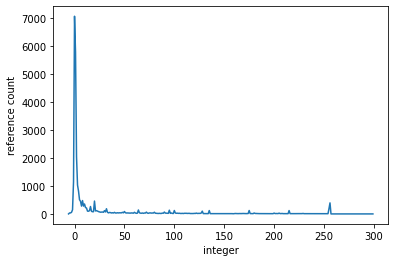

In [13]:
plt.plot(ints, refs)
plt.xlabel('integer')
plt.ylabel('reference count')
pass